# Arbol de decision para especies de flores

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('../python-ml-course-master/python-ml-course-master/datasets/iris/iris.csv')
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.shape

(150, 5)

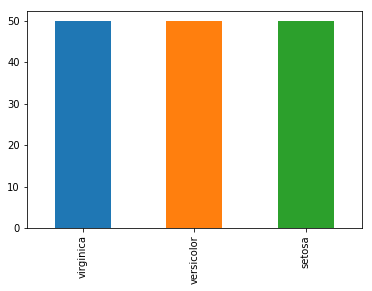

In [4]:
pd.Series(data.Species).value_counts().plot('bar')

In [5]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
col_names = data.columns.values.tolist()
predictors = col_names[:4]
target = col_names[4]

In [7]:
data['is_Train'] = np.random.uniform(0,1, len(data))<=0.75

(array([ 39.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 111.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

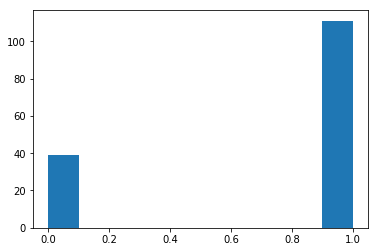

In [8]:
plt.hist(data.is_Train)

In [9]:
train , test = data[data['is_Train']==True], data[data['is_Train'] == False]

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
tree = DecisionTreeClassifier(criterion='entropy', min_samples_split=20, random_state=99)
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

In [12]:
preds = tree.predict(test[predictors])

In [13]:
pd.crosstab(test[target], preds, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,setosa,versicolor,virginica
Actual,,,
setosa,12,0,0
versicolor,0,14,0
virginica,0,0,13


# Visualizacion del Arbol de decision

In [14]:
from sklearn.tree import export_graphviz

In [15]:
with open('./recursos/iris_dtree.dot', "w") as dotfile:
    export_graphviz(tree, out_file=dotfile, feature_names=predictors)
    dotfile.close()

In [16]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
from graphviz import Source


In [17]:
file = open('./recursos/iris_dtree.dot', 'r')
text = file.read()
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="Petal.Length <= 2.45\\nentropy = 1.585\\nsamples = 111\\nvalue = [38, 36, 37]"] ;\n1 [label="entropy = 0.0\\nsamples = 38\\nvalue = [38, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Width <= 1.75\\nentropy = 1.0\\nsamples = 73\\nvalue = [0, 36, 37]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Petal.Length <= 4.95\\nentropy = 0.477\\nsamples = 39\\nvalue = [0, 35, 4]"] ;\n2 -> 3 ;\n4 [label="Petal.Width <= 1.65\\nentropy = 0.191\\nsamples = 34\\nvalue = [0, 33, 1]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.0\\nsamples = 33\\nvalue = [0, 33, 0]"] ;\n4 -> 5 ;\n6 [label="entropy = 0.0\\nsamples = 1\\nvalue = [0, 0, 1]"] ;\n4 -> 6 ;\n7 [label="entropy = 0.971\\nsamples = 5\\nvalue = [0, 2, 3]"] ;\n3 -> 7 ;\n8 [label="Petal.Length <= 4.85\\nentropy = 0.191\\nsamples = 34\\nvalue = [0, 1, 33]"] ;\n2 -> 8 ;\n9 [label="entropy = 0.918\\nsamples = 3\\nvalue = [0, 1, 2]"] ;\n8 

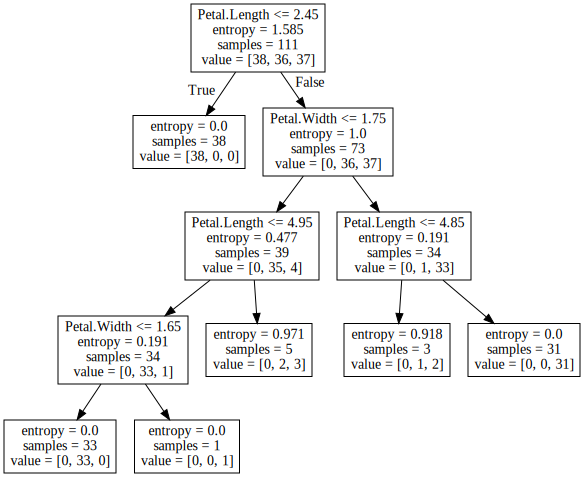

In [18]:
Source(text)

## Cross Validation para la poda

In [19]:
X = data[predictors]
y = data[target]

In [20]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20, random_state=99)
tree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

In [21]:
from sklearn.cross_validation import KFold

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
cv = KFold(n= X.shape[0], n_folds=10, shuffle=True, random_state=1)

In [23]:
from sklearn.cross_validation import cross_val_score

In [24]:
score = np.mean(cross_val_score(tree, X,y, scoring='accuracy', cv=cv, n_jobs=1))

In [25]:
score

0.9333333333333333

In [26]:
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(X,y)
    cv = KFold(n= X.shape[0], n_folds=10, shuffle=True, random_state=1)
    score = np.mean(cross_val_score(tree, X,y, scoring='accuracy', cv=cv, n_jobs=1))
    print('para profundidad ', i, ' la accuracy promedio es de ', score)
    print('    ',tree.feature_importances_)
    print('    ', predictors)

para profundidad  1  la accuracy promedio es de  0.5666666666666667
     [0. 0. 1. 0.]
     ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']
para profundidad  2  la accuracy promedio es de  0.9200000000000002
     [0.         0.         0.66620285 0.33379715]
     ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']
para profundidad  3  la accuracy promedio es de  0.9400000000000001
     [0.         0.         0.68976981 0.31023019]
     ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']
para profundidad  4  la accuracy promedio es de  0.9333333333333333
     [0.         0.         0.66869158 0.33130842]
     ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']
para profundidad  5  la accuracy promedio es de  0.9333333333333333
     [0.         0.         0.66869158 0.33130842]
     ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']
para profundidad  6  la accuracy promedio es de  0.9333333333333333
     [0.         0.         0

# Rndom Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
forest = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=100)
forest.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [31]:
forest.oob_decision_function_

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.90909091, 0.09090909, 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.

In [32]:
forest.oob_score_

0.9466666666666667